# *EDA To Prediction (DieTanic)

> ### *Sometimes life has a cruel sense of humor, giving you the thing you always wanted at the worst time possible.* -Lisa Kleypas

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. That's why the name **DieTanic**. This is a very unforgetable disaster that no one in the world can forget.

It took about $7.5 million to build the Titanic and it sunk under ther ocean due to collision. The Titanic Dataset is a very good dataset for begineers to start a journey in data science and participate in competitions in Kaggle.

The Objective of this notebook is to give an **idea how is the workflow in any predictive modeling problem**. How do we check features, how do we add new features and some Machine Learning Concepts. I have tried to keep the notebook as basic as possible so that even newbies can understand every phase of it.

If You Like the note book and think that it helped you..**PLEASE UPVOTE**. It will keep me motivated.

***
#### *Exploratory Data Analysis(탐색적 데이터 분석) *

# *EDA To Prediction (DieTanic)

> ### *때때로 인생은 가장 어려운 시기에 우리가 항상 원했던 것을 주는 잔인한 유머감각을 가진다.* -Lisa Kleypas

타이타닉 침몰은 역사상 가장 악명 높은 난파선 중 하나입니다. 1912 년 4 월 15 일, 첫 여행 중에 타이타닉은 빙산과 충돌하여 침몰하여 2224 명의 승객과 승무원 중 1502 명이 사망했습니다. 그것이 다이타닉이라는 이름의 이유입니다. 이것은 세상 어느 누구도 잊을 수없는 잊을 수없는 재앙입니다.

타이타닉을 만드는 데 약 750 만 달러가 들었으며 충돌로 인해 바다에서 침몰했습니다. 타이타닉 데이터 셋은 초보자가 데이터 분석 여행을 시작하고 캐글 경쟁에 참여할 수있는 매우 훌륭한 데이터 셋입니다.

이 문서의 목표는 ** 예측 모델링 문제에서 워크 플로가 어떻게 진행되는지 ** 아이디어를 제공하는 것입니다. 기능을 확인하는 방법, 새로운 기능 및 기계 학습 개념을 추가하는 방법 초보자도 문서의 모든 단계를 이해할 수 있도록 문서를 최대한 기본으로 유지하려고 노력했습니다.


***
#### *Exploratory Data Analysis(탐색적 데이터 분석) *

## Contents of the Notebook:

**Part1: Exploratory Data Analysis(EDA):**  
1)Analysis of the features.  
2)Finding any relations or trends considering multiple features.  

**Part2: Feature Engineering and Data Cleaning:**  
1)Adding any few features.  
2)Removing redundant features.  
3)Converting features into suitable form for modeling.  

**Part3: Predictive Modeling**  
1)Running Basic Algorithms.  
2)Cross Validation.  
3)Ensembling.  
4)Important Features Extraction.

## 목차

**가: 탐색적 데이터 분석(EDA):**  
1)특성 분석  
2)여러 개의 특성을 고려한 관계 혹은 경향 파악  

**나: 특성 설계 및 제작과 데이터 정리:**  
1)몇 개의 특성 추가  
2)중복 특성 제거  
3)특성을 모델링에 적합한 형태로 변환  

**다: 예측 모델링**  
1)기본 알고리즘으로 실행  
2)교차 검증  
3)조화/통일  
4)중요한 특징 추출

## Part1: Exploratory Data Analysis(EDA)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data=pd.read_csv('input/train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.isnull().sum() # checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The **Age, Cabin and Embarked** have null value. I will try to fix them.

#### How many Survived??

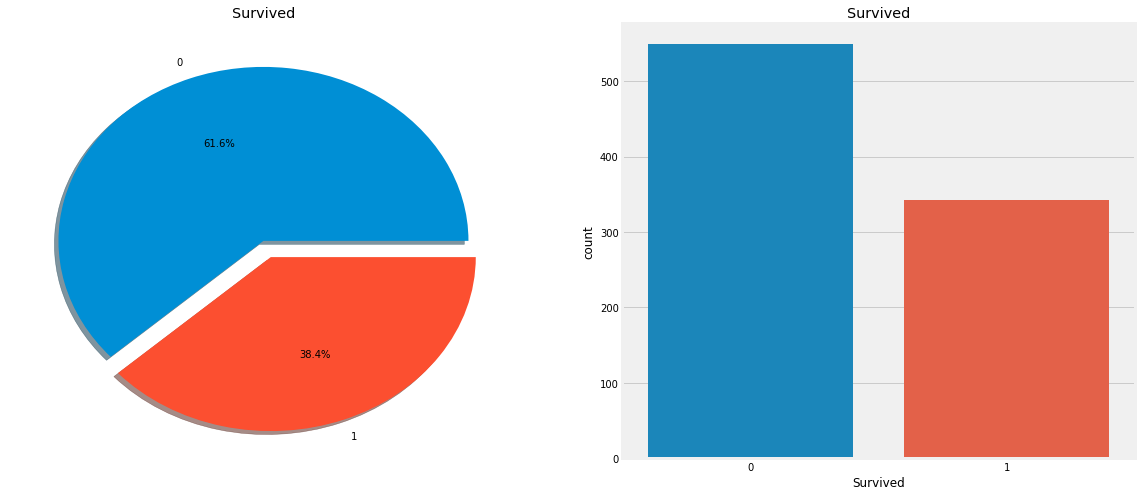

In [6]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = data, ax = ax[1])
ax[1].set_title('Survived')
plt.show()

It is evident that not many passengers survived the accident.  

Out of 891 passengers in traning set, only around 350 survived i.e Only 38.4% of the total training set survived the crash.  We need to dig down more to get better insights from the data and see which categories of the passengers did servive and who didn't.  

We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Part Of Embarcation, Age,etc.

First let us understand the different types of features.

사고로 살아남은 승객은 많지 않은 것이 분명하다.

트레이닝 세트에 있는 891명의 승객 중 약 350명만이 생존했다. 즉 전체 훈련 세트의 38.4% 만이 충돌에서 살아남았다. 우리는 승객의 어떤 부류가 살아남고 살아남지 못했는지 알 수 있는 데이터로부터 더 나은 이해를 위해 더 많은 것을 파헤쳐야 한다.

데이터 세트의 서로 다른 특성들에 따른 생존율을 확인하자. 특성은 성별, 부의 일부, 나이 등을 말한다.

먼저 이러한 다양한 유형의 특성들에 대해 이해해야 한다.

## Types Of Features

### Categorical Features:  
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them. For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as **Nominal Variables**.  

**Categorical Features in the dataset: Sex, Embarked.**

### Ordinal Feature:  
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like **Height** with values **Tall, Medium, Short,** then Height is a ordinal variable. Here we can have a relative sort in the variable.

**Ordinal Features in the dataset: PClass**

### Continous Feature:  
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.  

**Continous Features in the dataset: Age**

## 특성의 종류
### 범주형 특성 :
범주형 변수는 두 개 이상의 범주를 가진 변수로서, 해당 특성의 각 값은 범주별로 분류할 수 있다. 예를 들어 성별은 두 개의 범주(남성과 여성)를 갖는 범주형 변수다. 이제 우리는 그러한 변수들에 대해 정렬을 할 수도 다른 어떤 주문도 할 수 없다. 그들은 **명목 변수**라고도 한다.

**데이터 세트의 범주형 특성 : 성별, 착수.**

### 순서형 특성 :
순서형 변수는 범주형과 비슷하지만 그 차이점은 값 사이의 상대적 순서를 갖거나 또는 정렬이 가능하다는 것입니다. 예를 들어, **긴, 중간, 짧음** 값을 가진 **Height**와 같은 특성이 있으면 Height는 순서형 변수다. 여기서 변수에서 상대적인 정렬을 할 수 있다.

**데이터 세트의 순서형 특성 : PClass(승객 좌석 혹은 룸 등급)**

### 연속적 특성 :
특성의 열 중 최소값과 최대값 사잇값 혹은 어느 두 지점 사잇값을 가질 수 있으면 연속적 특성이라고 한다.

**데이터 세트의 연속적 특성 : 나이**

### Analysis The Features
### 특성 분석

### Sex --> Categorical Feature
### 성 --> 범주형 특성

In [7]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

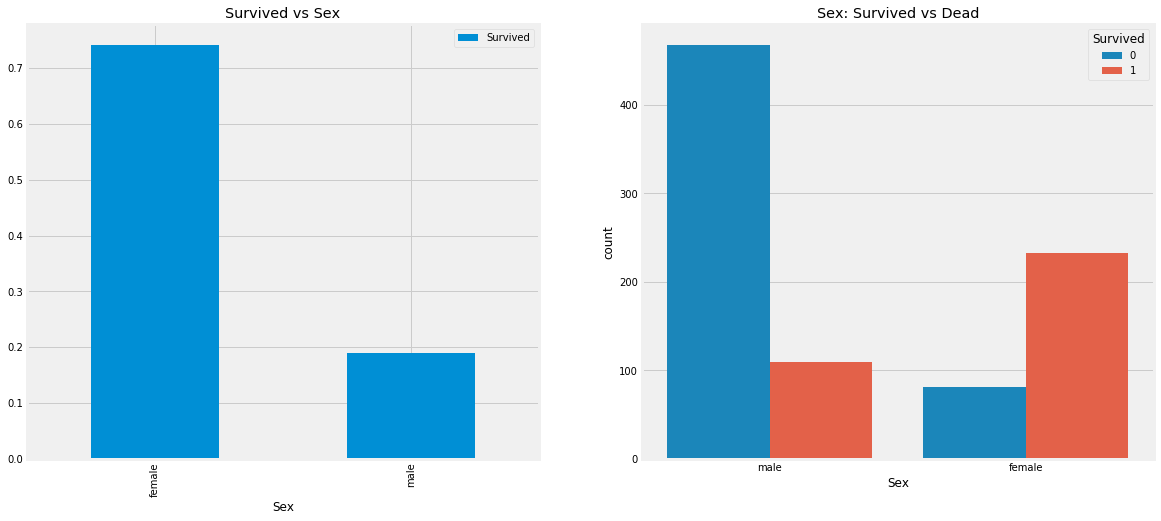

In [15]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survived rates for a **women on the ship is around 75% while that for men in around 18-19%**.

This looks to be a **very important** feature for modeling. But is it the best? Lets check other features.

흥미로운 결과를 볼 수 있다. 배에 타고 있는 남성은 여성보다 훨씬 많다. 그럼에도 불구하고 살아남은 여성은 살아남은 남성의 거의 두 배다. 배에 탄 **여성의 생존율은 약 75%인데 반해 남성은 약 18-19%**이다.

이것은 모델링을 위한 **매우 중요한** 특징으로 보인다. 하지만 이게 최고일까? 다른 특성을 확인해보자.

### Pclass --> Ordinal Feature
### 승객 등급 --> 순서형 특성

In [16]:
pd.crosstab(data.Pclass, data.Survived, margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


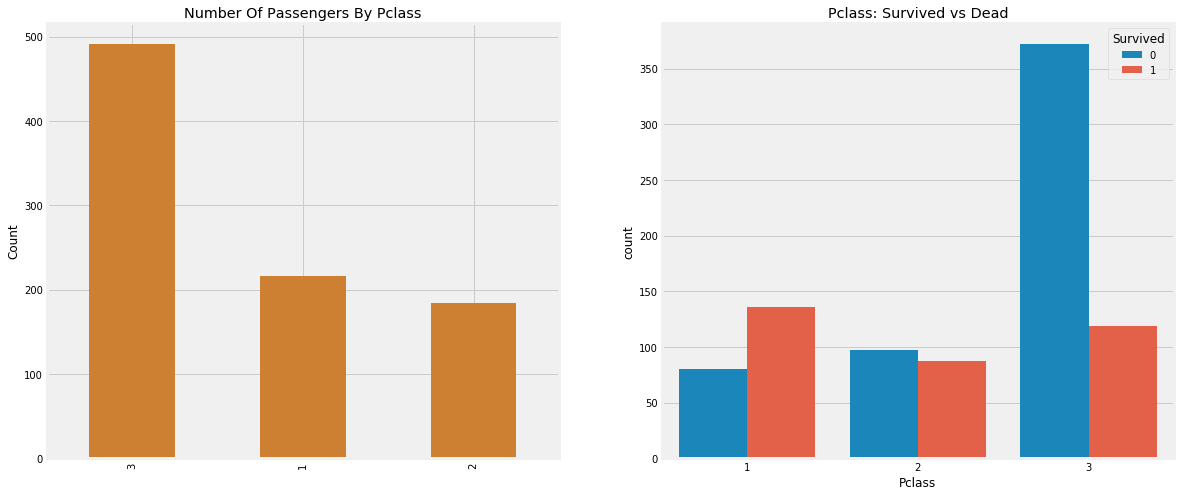

In [19]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data['Pclass'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00', '#D3D3D3'], ax = ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

People say **Money Can't Buy Everything**. But we can clearly see that Passengers Of Pclass 1 were given a very high priority while rescue. Even though the number of Passengers in Pclass 3 were a lot higher, still the number of servival from them is very low, somewhere around **25%**.

For Pclass 1% survived is around **63%** while for Pclass 2 is around **48%**. So money and status matters. Such a materialistic world  

Let's Dive in little bit more and check for other interesting observations. Lets check survival rate with **Sex and Pclass** Together.

사람들은 **"돈으로 모든 것을 살 순 없다."**라고 말한다. 그러나 우리는 1등급의 승객들이 구조하는 것에 있어 매우 높은 우선순위를 가졌다는 것을 분명하게 알 수 있다. 3등급의 승객들의 수가 훨씬 더 많았음에도 불구하고, 그들의 생존율은 약 25%로 매우 낮았다.

1등급 승객의 경우 생존율은 약 63%이며, 2등급에 경우 약 48%이다. 그래서 돈과 지위가 중요하다. 이런 물질만능주의.

좀 더 자세히 살펴보고 다른 흥미로운 관찰 결과를 확인해보자. 성과 등급을 묶어서 생존율을 확인해보자.

In [20]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

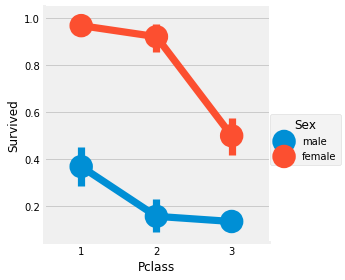

In [21]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = data)
plt.show()

We use FactorPlot in this case, because they make the seperation of categorical values easy.

Looking at the **CrossTab** and the **FactorPlot**, we can easily infer that servival for **Women from Pclass1** is about **95~96%**, as only 3 out of 94 Women from Pclass1 died.

It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low servival rate.

Looks like Pclass is also an important feature. Let's analyse other features.

이런 경우에는 FactorPlot을 사용한다. 왜냐하면 이 차트는 범주형 값의 분리가 용이하기 때문이다.

**CrossTab**과 **FatorPlot**을 보면, 1등급의 여성 94명 중 3명만이 사망했기 때문에 1등급 여성의 생존율은 약 **95~96%**라고 쉽게 추론할 수 있다.

승객의 등급에 상관 없이, 여성은 구조에 대한 우선권을 가졌다는 것을 알 수 있다. 남성은 1등급 조차도 생존율이 매우 낮기 때문이다.

Pclass도 중요한 특성인 것 같다. 다른 특징들을 분석하자.

### Age --> Continous Feature
### 나이 --> 연속적 특성

In [22]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


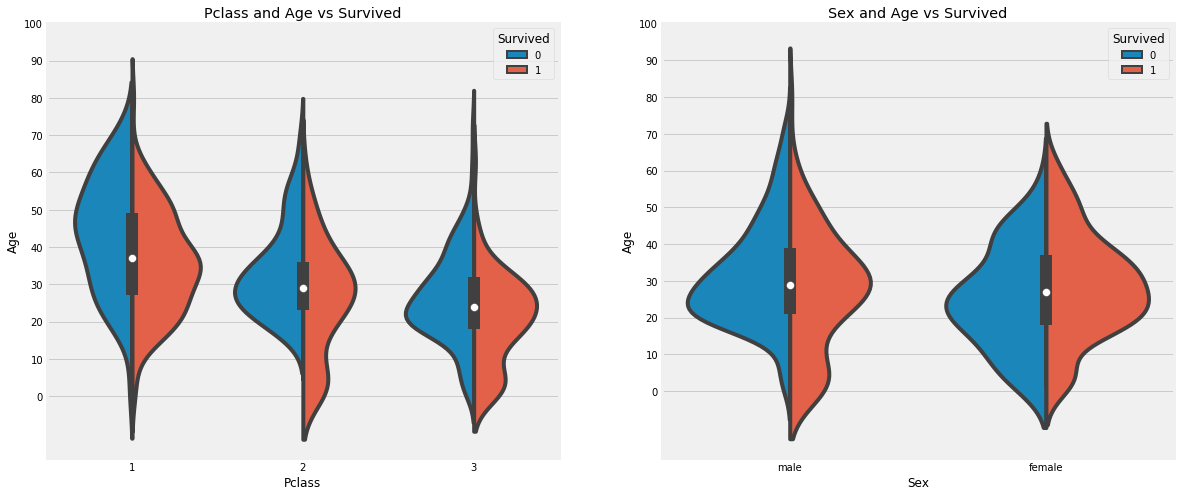

In [24]:
f, ax = plt.subplots(1, 2, figsize = (18,8))
sns.violinplot('Pclass', 'Age', hue = 'Survived', data = data, split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue = 'Survived', data = data, split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

**Observations:**  
1)The number of children increases with Pclass and the survival rate for passengers below Age 10(i.e children) looks to be good irrespective of the Pclass.  

2)Survival chances for Passengers aged 20-50 from Pclass1 is high and is even better for Women.  

3)For males, the survival chances decreases with an increase in age.


As we had seen earlier, the Age feature has **177** null values. To replace these NaN values, we can assign them the mean age of the dataset.  

But the problem is, there were many people with many different ages. We just can't assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??

**Bingo!!!**, we can check the **Name** feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.  

**"What's In A Name??"** ---> **Feature** :p

**관찰 결과:**  
1)Pclass에 따라 어린이 수가 증가하고, 10세 미만 승객(즉, 어린이)의 생존율은 Pclass에 관계없이 양호해 보인다.  

2)1등급부터 20-50세 승객의 생존 가능성은 높고 여성의 경우 더욱 높다.

3)남성의 경우 나이가 많아지면 생존 확률이 줄어든다.

앞서 살펴본 바와 같이, 나이 특성은 **177**개의 null 값을 가지고 있다. 이러한 NaN 값을 대체하기 위해 데이터 세트의 평균 연령을 할당할 수 있다.

그런데 문제는 나이 차이가 많이 나는 사람들이 많다는 것이다. 4살 아이 29살의 평균 연령으로 배정하면 안된다. 승객의 연령대에 대한 거짓말을 알 수 있는 방법이 있는가?

**빙고!!!**, **이름** 특성을 확인할 수 있다. 그 특성을 보면, 우리는 그 이름들이 앞에 Mr. 또는 Mrs.를 가지는 것을 알 수 있다. 따라서 우리는 각 그룹에 Mr.와 Mrs.의 평균 값을 할당할 수 있다.

**"이름이 뭘 나타내지??"** --> **특성** :p

In [26]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

Okay so here we are using the Regex: **[A-Za-z]+).**. So what it does is, it looks for strings which lie between **A-Z or a-z** and followed by a **.(dot)**. So we successfully extract the Initials from the Name.

여기에선 정규 표현식:**[A-Za-z]+).**을 사용한다. 그렇게 알파벳 문자들 사이에 있는 **.(점)**을 찾는다. 우리는 이름에서 .(점) 앞 문자들을 추출하는데 성공했다.

In [28]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap = 'summer_r')
#Checking the Initials with the Sex 성에 따른 이니셜을 체크한다.

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Okay so there are misspelled Initials like Mlle or Mme that stand for Miss. I will replace them with Miss and same thing for other values.

Miss를 나타내는 Mlle이나 Mme같은 철자가 틀린 이니셜이 있다. 그것들을 Miss.와 other 값으로 교체할 것이다.

In [29]:
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'],['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace=True)

In [30]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Filling NaN Ages

In [31]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial=='Master'), 'Age'] = 35
data.loc[(data.Age.isnull())&(data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial=='Other'), 'Age'] = 46

In [32]:
data.Age.isnull().any() # So no null values left finally

False

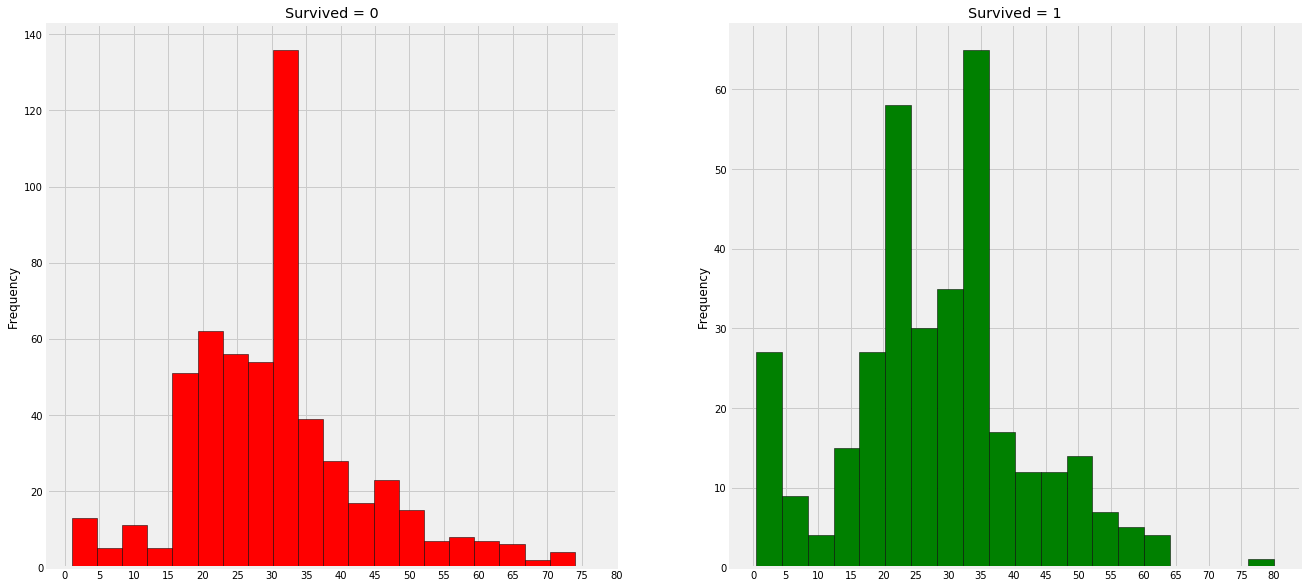

In [33]:
f, ax = plt.subplots(1, 2, figsize = (20, 10))
data[data['Survived'] == 0].Age.plot.hist(ax = ax[0], bins = 20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived = 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

#### Observations:  
1)The Toddlers(age<5) were saved in large numbers(the Women and child First Policy). 
  
2)The oldest Passenger was saved(80 years).  

3)Maximum number of deaths were in the age group of 30-40

#### 관찰 결과:
1)5세 미만의 아기는 대다수가 살아남았다.(구조 최우선순위는 여성과 아이다.)  

2)가장 나이가 많은 승객(80세)이 살아남았다.  

3)30-40대가 가장 많이 죽은 그룹이다.

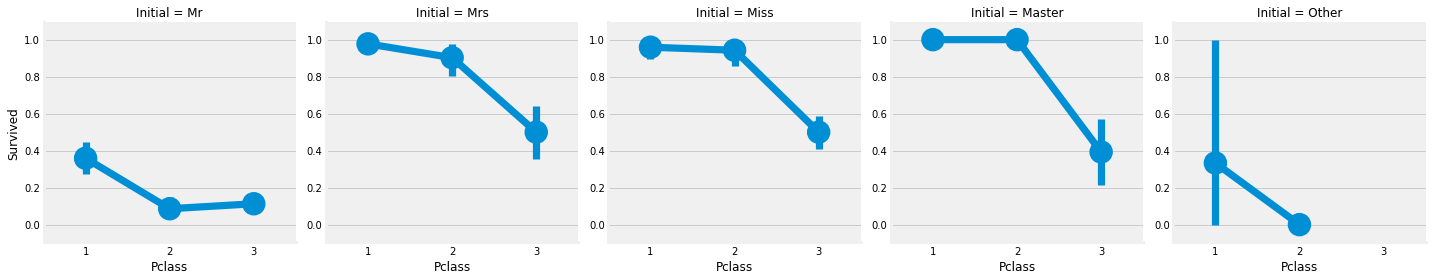

In [35]:
sns.factorplot('Pclass', 'Survived', col='Initial', data = data)
plt.show()

The Women and Child first policy thus holds true irrespective of the class.  
여성과 아이의 구조 우선순위는 등급에 상관없이 높다는 것이 사실이다.

### Embarked --> Categorical Value
### 착수 --> 범주형 값

In [36]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

#### Chances for Survival by Port Of Embarkation
#### 항만별 생존 가능성

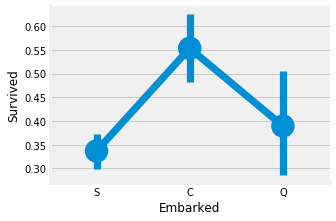

In [37]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

The chances for survival for Port C is highest around 0.55 while it is lowest for S.  
C 항만의 생존율은 약 0.55로 가장 높은 반면, S 항만은 가장 낮다.

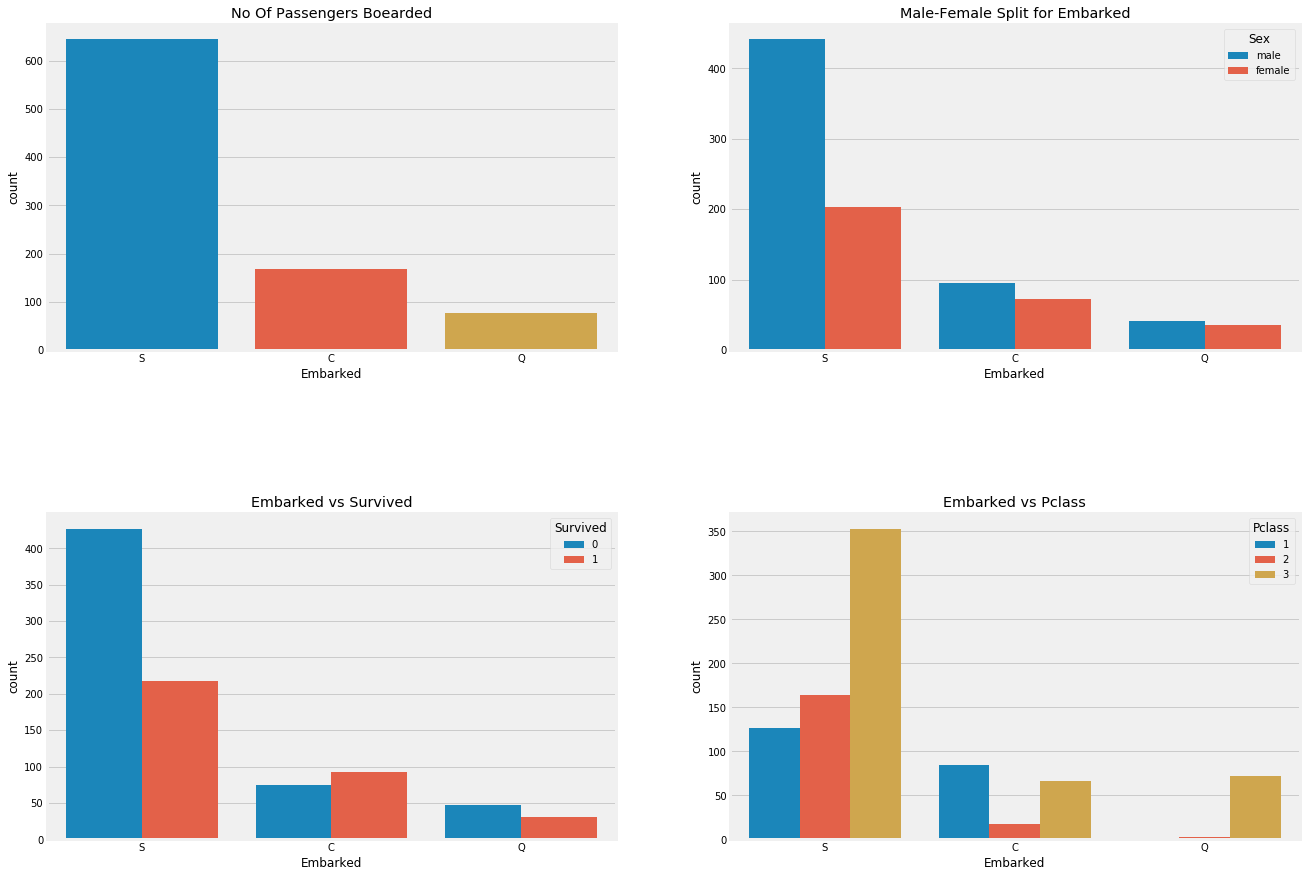

In [38]:
f, ax=plt.subplots(2,2,figsize=(20,15))

sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No Of Passengers Boearded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()